In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('Private_Or_Not/dataSet_2.csv')
data

,Unnamed: 0,Unnamed: 0.1,Instituto,Localidad,Presentados,Aptos,Media Expediente,Media PAU,coordinate,NumBib 2 km,NumBib 5 km,NumBib 8 km,NumBib 10 km,private
0,0,0,CENTRE PRIVAT LA PURÍSIMA,ALZIRA,34,34,7.9,6.6,"[39.153307, -0.4422964]",0,3,7,7,True
1,1,1,IES REI EN JAUME,ALZIRA,59,56,7.6,6.2,"[39.146734, -0.4306395]",0,1,5,7,False
2,2,2,IES JOSÉ MARÍA PARRA,ALZIRA,39,36,7.0,5.2,"[39.1569694, -0.4292533]",0,1,5,7,False
3,3,3,CENTRE PRIVAT NUESTRA SEÑORA DE LA SALUD,ALGEMESÍ,30,30,8.2,7.1,"[39.1827727, -0.4375332]",1,3,6,9,True
4,4,4,IES SANT VICENT FERRER,ALGEMESÍ,30,30,8.0,7.1,"[39.1858352, -0.4375209]",1,3,6,9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,456,457,ES L'ALLUSSER,MUTXAMEL,28,24,7.3,5.0,"[38.4209557, -0.4456107]",1,8,15,44,False
457,457,458,CENTRO PRIVADO SAN ALBERTO MAGNO,MONFORTE DEL CID,8,8,8.4,5.8,"[38.38134, -0.7189599999999999]",1,1,3,3,True
458,458,459,IES MARÍA BLASCO,SANT VICENT DEL RASPEIG,50,49,7.5,5.5,"[38.3905117, -0.5212411]",3,11,42,44,False
459,459,460,CENTRE PRIVAT EL VALLE,ALACANT,10,10,7.9,6.9,"[38.5793, -0.1033]",1,5,9,10,True


In [3]:
data[['Media Expediente','Media PAU','private']].corr(method ='pearson')

,Media Expediente,Media PAU,private
Media Expediente,1.000000,0.482846,0.141317
Media PAU,0.482846,1.000000,0.129262
private,0.141317,0.129262,1.000000


In [4]:
private_schools_grades_exp = data[data.private == True]['Media Expediente']
private_schools_grades_pau = data[data.private == True]['Media PAU']
public_schools_grades_exp = data[data.private == False]['Media Expediente']
public_schools_grades_pau = data[data.private == False]['Media PAU']

In [5]:
import matplotlib.pyplot as plt

plt.ylabel('No of times')
plt.hist(private_schools_grades_exp, bins=10)

(array([ 1.,  3.,  0., 21., 17., 38., 37., 13.,  2.,  1.]),
 array([6.2 , 6.48, 6.76, 7.04, 7.32, 7.6 , 7.88, 8.16, 8.44, 8.72, 9.  ]),
 <a list of 10 Patch objects>)

Text(0, 0.5, 'No of times')

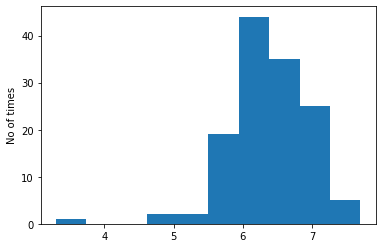

In [6]:
plt.hist(private_schools_grades_pau, bins=10)
plt.ylabel('No of times')

Text(0, 0.5, 'No of times')

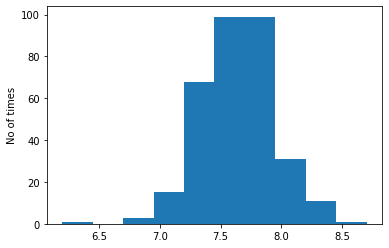

In [7]:
plt.hist(public_schools_grades_exp, bins=10)
plt.ylabel('No of times')

Text(0, 0.5, 'No of times')

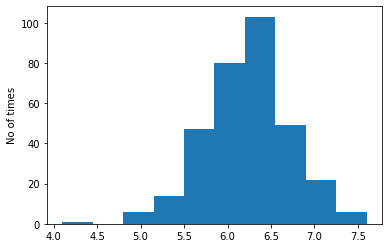

In [8]:
plt.hist(public_schools_grades_pau, bins=10)
plt.ylabel('No of times')

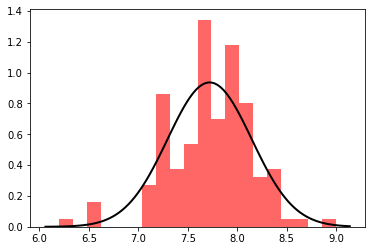

In [11]:
from scipy.stats import norm

mu, std = norm.fit(private_schools_grades_exp)
plt.hist(private_schools_grades_exp, bins=20, density=True, alpha=0.6, color='r')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

7.7218045112781954
7.612804878048781


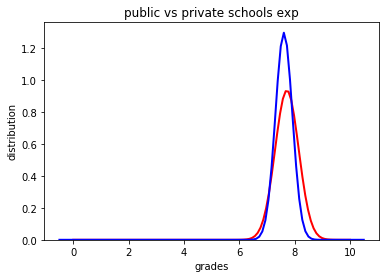

In [14]:
mu, std = norm.fit(private_schools_grades_exp)
plt.hist(private_schools_grades_exp, bins=10, density=True, alpha=0.6, color='w')
xmin, xmax = 0,10
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2,color='r')
print(mu)

mu, std = norm.fit(public_schools_grades_exp)
plt.hist(private_schools_grades_exp, bins=10, density=True, alpha=0.6, color='w')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2,color='b')
plt.title('public vs private schools exp')
plt.xlabel('grades')
plt.ylabel('distribution')
print(mu)

6.357142857142857
6.2073170731707314


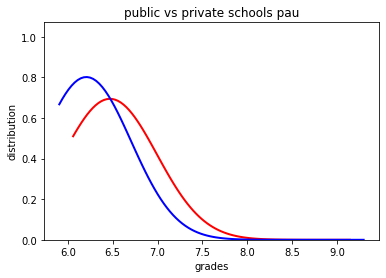

In [14]:
mu, std = norm.fit(private_schools_grades_pau)
plt.hist(private_schools_grades_exp, bins=10, density=True, alpha=0.6, color='w')
xmin, xmax = plt.xlim()
x1 = np.linspace(xmin, xmax, 100)
p1 = norm.pdf(x, mu, std)
plt.plot(x1, p1, 'k', linewidth=2,color='r')
print(mu)

mu, std = norm.fit(public_schools_grades_pau)
plt.hist(private_schools_grades_exp, bins=10, density=True, alpha=0.6, color='w')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2,color='b')
plt.title('public vs private schools pau')
plt.xlabel('grades')
plt.ylabel('distribution')
print(mu)